In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('darkgrid')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df = pd.read_csv('cancer_classification.csv')

In [5]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


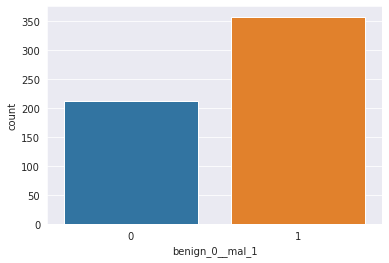

In [7]:
sns.countplot(x='benign_0__mal_1', data = df)

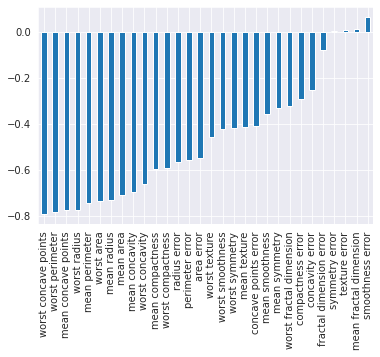

In [11]:
df.corr()['benign_0__mal_1'][:-1].sort_values().plot(kind='bar')

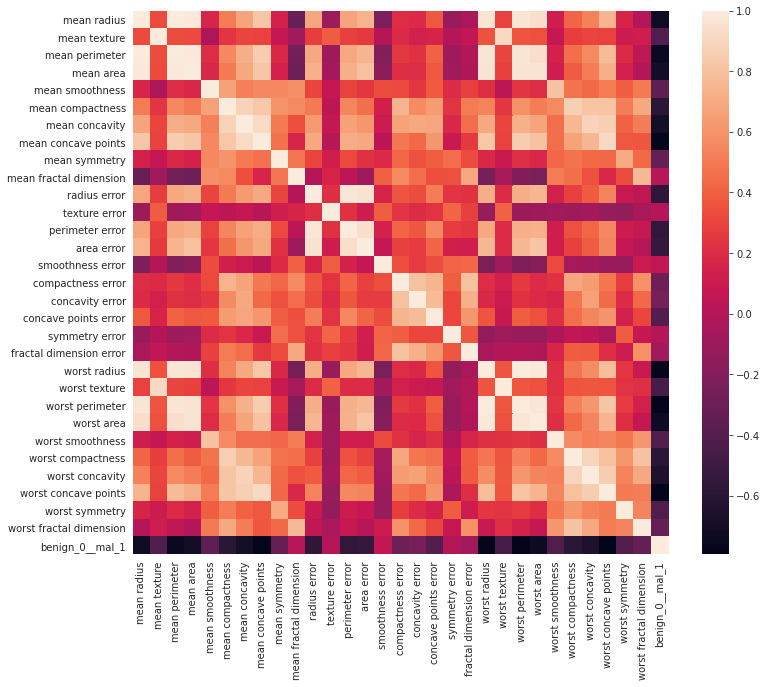

In [13]:
plt.figure(figsize = (12, 10))
sns.heatmap(df.corr())

In [16]:
X = df.drop('benign_0__mal_1', axis = 1).values
y = df['benign_0__mal_1'].values

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

In [19]:
from sklearn.preprocessing import MinMaxScaler

In [20]:
scaler = MinMaxScaler()

In [21]:
X_train = scaler.fit_transform(X_train)

In [22]:
X_test = scaler.transform(X_test)

In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [24]:
X_train.shape

(426, 30)

In [25]:
model = Sequential()

model.add(Dense(30, activation='relu'))

model.add(Dense(15, activation='relu'))

#BINARY CLASSIFICATION
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam')

In [26]:
model.fit(x=X_train, y=y_train, epochs=600, 
          validation_data=(X_test, y_test))

Epoch 1/600
14/14 [==============================] - 0s 15ms/step - loss: 0.6870 - val_loss: 0.6647
Epoch 2/600
14/14 [==============================] - 0s 5ms/step - loss: 0.6411 - val_loss: 0.6251
Epoch 3/600
14/14 [==============================] - 0s 5ms/step - loss: 0.6018 - val_loss: 0.5875
Epoch 4/600
14/14 [==============================] - 0s 14ms/step - loss: 0.5625 - val_loss: 0.5468
Epoch 5/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5226 - val_loss: 0.5047
Epoch 6/600
14/14 [==============================] - 0s 4ms/step - loss: 0.4813 - val_loss: 0.4603
Epoch 7/600
14/14 [==============================] - 0s 4ms/step - loss: 0.4388 - val_loss: 0.4163
Epoch 8/600
14/14 [==============================] - 0s 4ms/step - loss: 0.3987 - val_loss: 0.3737
Epoch 9/600
14/14 [==============================] - 0s 4ms/step - loss: 0.3616 - val_loss: 0.3335
Epoch 10/600
14/14 [==============================] - 0s 5ms/step - loss: 0.3275 - val_loss: 0.3016
Epoch 1

In [27]:
losses = pd.DataFrame(model.history.history)

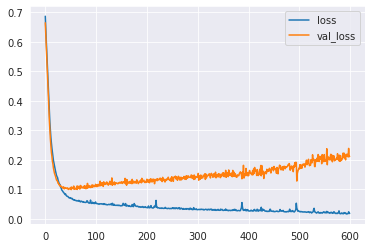

In [28]:
losses.plot()

In [29]:
model = Sequential()

model.add(Dense(30, activation='relu'))

model.add(Dense(15, activation='relu'))

#BINARY CLASSIFICATION
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam')

In [30]:
from tensorflow.keras.callbacks import EarlyStopping

In [31]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

In [32]:
model.fit(x=X_train, y=y_train, epochs=600, 
          validation_data=(X_test, y_test),
          callbacks=[early_stop])

Epoch 1/600
14/14 [==============================] - 0s 10ms/step - loss: 0.6762 - val_loss: 0.6539
Epoch 2/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6309 - val_loss: 0.6087
Epoch 3/600
14/14 [==============================] - 0s 5ms/step - loss: 0.5851 - val_loss: 0.5625
Epoch 4/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5410 - val_loss: 0.5154
Epoch 5/600
14/14 [==============================] - 0s 4ms/step - loss: 0.4945 - val_loss: 0.4679
Epoch 6/600
14/14 [==============================] - 0s 5ms/step - loss: 0.4492 - val_loss: 0.4201
Epoch 7/600
14/14 [==============================] - 0s 4ms/step - loss: 0.4034 - val_loss: 0.3762
Epoch 8/600
14/14 [==============================] - 0s 5ms/step - loss: 0.3668 - val_loss: 0.3387
Epoch 9/600
14/14 [==============================] - 0s 4ms/step - loss: 0.3306 - val_loss: 0.3051
Epoch 10/600
14/14 [==============================] - 0s 4ms/step - loss: 0.3042 - val_loss: 0.2786
Epoch 11

In [33]:
model_loss = pd.DataFrame(model.history.history)

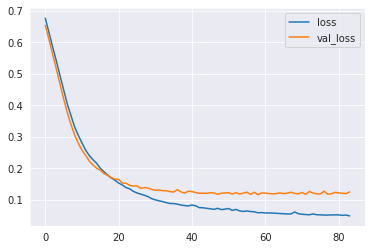

In [34]:
model_loss.plot()

In [35]:
from tensorflow.keras.layers import Dropout

In [36]:
model = Sequential()

model.add(Dense(30, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(15, activation='relu'))
model.add(Dropout(0.5))

#BINARY CLASSIFICATION
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam')

In [37]:
model.fit(x=X_train, y=y_train, epochs=600, 
          validation_data=(X_test, y_test),
          callbacks=[early_stop])

Epoch 1/600
14/14 [==============================] - 0s 10ms/step - loss: 0.6906 - val_loss: 0.6738
Epoch 2/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6709 - val_loss: 0.6545
Epoch 3/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6760 - val_loss: 0.6354
Epoch 4/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6434 - val_loss: 0.6176
Epoch 5/600
14/14 [==============================] - 0s 5ms/step - loss: 0.6130 - val_loss: 0.5893
Epoch 6/600
14/14 [==============================] - 0s 5ms/step - loss: 0.6130 - val_loss: 0.5647
Epoch 7/600
14/14 [==============================] - 0s 5ms/step - loss: 0.5853 - val_loss: 0.5372
Epoch 8/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5597 - val_loss: 0.5068
Epoch 9/600
14/14 [==============================] - 0s 5ms/step - loss: 0.5577 - val_loss: 0.4809
Epoch 10/600
14/14 [==============================] - 0s 5ms/step - loss: 0.5251 - val_loss: 0.4530
Epoch 11

In [38]:
model_loss = pd.DataFrame(model.history.history)

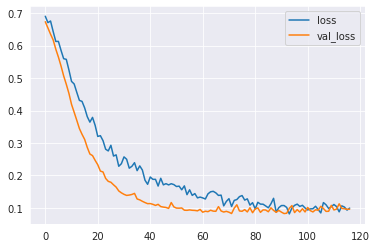

In [39]:
model_loss.plot()

In [40]:
predictions = model.predict_classes(X_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [41]:
from sklearn.metrics import classification_report, confusion_matrix

In [42]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.95      0.98      0.96        55
           1       0.99      0.97      0.98        88

    accuracy                           0.97       143
   macro avg       0.97      0.97      0.97       143
weighted avg       0.97      0.97      0.97       143



In [43]:
print(confusion_matrix(y_test, predictions))

[[54  1]
 [ 3 85]]
